In [11]:
import roboticstoolbox as rtb

import spatialmath as sm
import numpy as np
from swift import Swift


In [3]:
robot = rtb.models.Panda()
print(robot)


ERobot: panda (by Franka Emika), 7 joints (RRRRRRR), 1 gripper, geometry, collision
┌─────┬──────────────┬───────┬─────────────┬────────────────────────────────────────────────┐
│link │     link     │ joint │   parent    │              ETS: parent to link               │
├─────┼──────────────┼───────┼─────────────┼────────────────────────────────────────────────┤
│   0 │ panda_link0  │       │ BASE        │ SE3()                                          │
│   1 │ panda_link1  │     0 │ panda_link0 │ SE3(0, 0, 0.333) ⊕ Rz(q0)                      │
│   2 │ panda_link2  │     1 │ panda_link1 │ SE3(-90°, -0°, 0°) ⊕ Rz(q1)                    │
│   3 │ panda_link3  │     2 │ panda_link2 │ SE3(0, -0.316, 0; 90°, -0°, 0°) ⊕ Rz(q2)       │
│   4 │ panda_link4  │     3 │ panda_link3 │ SE3(0.0825, 0, 0; 90°, -0°, 0°) ⊕ Rz(q3)       │
│   5 │ panda_link5  │     4 │ panda_link4 │ SE3(-0.0825, 0.384, 0; -90°, -0°, 0°) ⊕ Rz(q4) │
│   6 │ panda_link6  │     5 │ panda_link5 │ SE3(90°, -0°, 0°) ⊕ Rz(q5

In [4]:
Te = robot.fkine(robot.qr)  # forward kinematics
print(Te)


   0.995     0         0.09983   0.484     
   0        -1         0         0         
   0.09983   0        -0.995     0.4126    
   0         0         0         1         



In [5]:
from spatialmath import SE3

Tep = SE3.Trans(0.6, -0.3, 0.1) * SE3.OA([0, 1, 0], [0, 0, -1])
sol = robot.ik_LM(Tep)         # solve IK
print(sol)
sol = (([ 0.20592815,  0.86609481, -0.79473206, -1.68254794,  0.74872915, # Setting sol to the same as in the tutorial to compare results.
			2.21764746, -0.10255606]), 1, 114, 7, 2.890164057230228e-07)
q_pickup = sol[0]
print(robot.fkine(q_pickup))  

(array([ 0.41450893,  1.13672888, -1.14131016, -1.64542976,  1.12793903,
        1.99092266,  2.88814731]), 1, 92, 5, 5.295544876330812e-08)
   1        -8.913e-05 -0.0003334  0.5996    
  -8.929e-05 -1        -0.0004912 -0.2998    
  -0.0003334  0.0004912 -1         0.1001    
   0         0         0         1         



In [6]:
robot

ERobot: panda (by Franka Emika), 7 joints (RRRRRRR), 1 gripper, geometry, collision
┌─────┬──────────────┬───────┬─────────────┬────────────────────────────────────────────────┐
│link │     link     │ joint │   parent    │              ETS: parent to link               │
├─────┼──────────────┼───────┼─────────────┼────────────────────────────────────────────────┤
│   0 │ panda_link0  │       │ BASE        │ SE3()                                          │
│   1 │ panda_link1  │     0 │ panda_link0 │ SE3(0, 0, 0.333) ⊕ Rz(q0)                      │
│   2 │ panda_link2  │     1 │ panda_link1 │ SE3(-90°, -0°, 0°) ⊕ Rz(q1)                    │
│   3 │ panda_link3  │     2 │ panda_link2 │ SE3(0, -0.316, 0; 90°, -0°, 0°) ⊕ Rz(q2)       │
│   4 │ panda_link4  │     3 │ panda_link3 │ SE3(0.0825, 0, 0; 90°, -0°, 0°) ⊕ Rz(q3)       │
│   5 │ panda_link5  │     4 │ panda_link4 │ SE3(-0.0825, 0.384, 0; -90°, -0°, 0°) ⊕ Rz(q4) │
│   6 │ panda_link6  │     5 │ panda_link5 │ SE3(90°, -0°, 0°) ⊕ Rz(q5

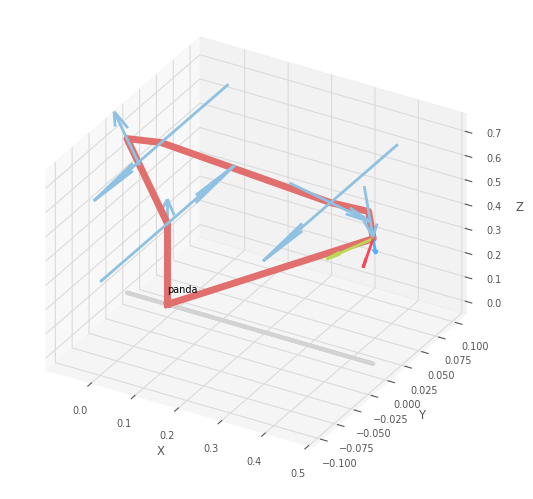

PyPlot3D backend, t = 2.499999999999999, scene:
  robot: Text(0.0, 0.0, 'panda')

<Figure size 640x480 with 0 Axes>

In [7]:
qt = rtb.jtraj(robot.qr, q_pickup,50)
robot.plot(qt.q, backend='pyplot', movie='panda3.gif')

In [8]:
robot.plot(qt.q)

Swift backend, t = 2.499999999999999, scene:
  panda

In [12]:
# Make and instance of the Swift simulator and open it in the notebook 
env = Swift()
env.launch(realtime=True, browser="notebook")

# Make a panda model and set its joint angles to the ready joint configuration
panda = rtb.models.Panda()
panda.q = panda.qr

# Set a desired and effector pose an an offset from the current end-effector pose
Tep = panda.fkine(panda.q) * sm.SE3.Tx(0.2) * sm.SE3.Ty(0.2) * sm.SE3.Tz(0.45)

# Add the robot to the simulator
env.add(panda)

#env.hold()
# Simulate the robot while it has not arrived at the goal
arrived = False
while not arrived:

    # Work out the required end-effector velocity to go towards the goal
    v, arrived = rtb.p_servo(panda.fkine(panda.q), Tep, 1)
    
    # Set the Panda's joint velocities
    panda.qd = np.linalg.pinv(panda.jacobe(panda.q)) @ v
    
    # Step the simulator by 50 milliseconds
    env.step(0.05)